In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf


# Define the file path
file_path = r'C:\Users\vkori\Desktop\PYTHON TASKS\ER.xlsx'  # Use 'r' before the string to treat it as a raw string

# Load the dataset from the specified path
data = pd.read_excel(file_path)

# Define the cutoff age
cutoff_age = 21

# Create the centered running variable
data['centered_age'] = data['age'] - cutoff_age

# Create the binary treatment variable
data['treatment'] = (data['age'] >= cutoff_age).astype(int)

# Create the new outcome variable, for example 'new_outcome'
data['new_outcome'] = data['all']  # Replace 'all' with the actual column name of the outcome variable

# Display the first few rows of the preprocessed data
print(data.head())


     alcohol          all       injury      illness        age  centered_age  \
0  42.804927  3496.384281  1321.324173  2134.895744  17.666667     -3.333333   
1  43.152370  3456.984291  1293.737231  2122.665765  17.750000     -3.250000   
2  42.665950  3466.017798  1284.842701  2140.871757  17.833333     -3.166667   
3  47.599635  3492.631901  1268.860342  2180.132769  17.916667     -3.083333   
4  55.729792  3602.284782  1257.047294  2293.746497  18.000000     -3.000000   

   treatment  new_outcome  
0          0  3496.384281  
1          0  3456.984291  
2          0  3466.017798  
3          0  3492.631901  
4          0  3602.284782  


In [ ]:
"""

# Assuming your DataFrame is named 'data'
# Replace 'data' with the actual name of your DataFrame if it's different

file_path = r'C:\Users\vkori\Desktop\PYTHON TASKS\ER11.csv'  # Specify the desired file path

data.to_csv(file_path, index=False)  # Save the DataFrame to a CSV file without including the index
"""

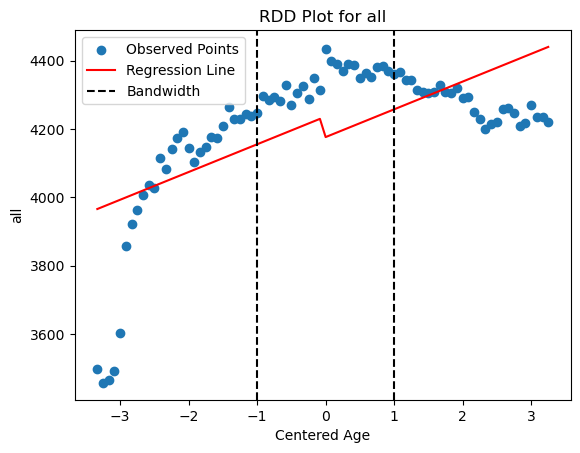

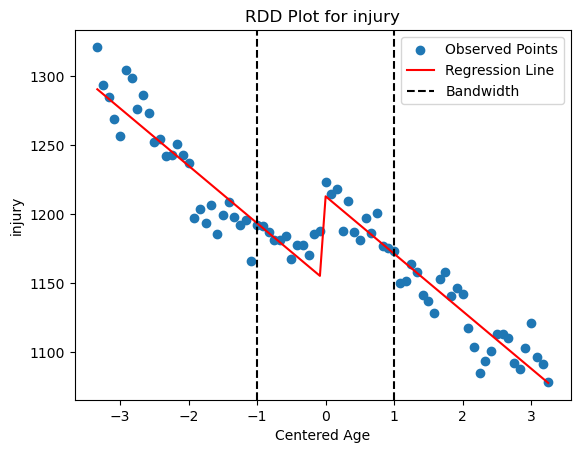

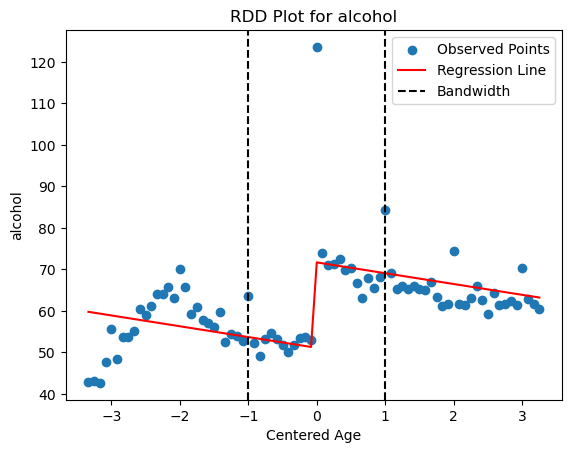

In [48]:


# Create RDD plots for each outcome variable
for outcome_variable in outcome_variables:
    # Create a formula for the RDD analysis
    formula = f"{outcome_variable} ~ centered_age + treatment"

    # Fit the RDD model with the specified bandwidth
    rdd_model = smf.ols(formula, data=data)

    # Fit the model
    rdd_results = rdd_model.fit()

    # Extract data for the plot
    x = data['centered_age']
    y = data[outcome_variable]
    predicted_values = rdd_results.fittedvalues

    # Create RDD plot
    plt.figure()
    plt.scatter(x, y, label="Observed Points")
    plt.plot(x, predicted_values, 'r', label="Regression Line")
    plt.axvline(x=bandwidth, color='k', linestyle='--', label="Bandwidth")
    plt.axvline(x=-bandwidth, color='k', linestyle='--')
    plt.xlabel('Centered Age')
    plt.ylabel(outcome_variable)
    plt.title(f"RDD Plot for {outcome_variable}")
    plt.legend()
    plt.show()


In [47]:
# Extract and print the RDD estimates and 95% confidence intervals
treatment_effect = rdd_results.params['treatment']
confidence_interval = rdd_results.conf_int(alpha=0.05).loc['treatment']
print(f"Treatment Effect: {treatment_effect}")
print(f"95% Confidence Interval: [{confidence_interval[0]}, {confidence_interval[1]}")


Treatment Effect: -140.4270257613116
95% Confidence Interval: [-289.8619286760627, 9.007877153439466
